## Problem description
Problem is described in README with enough context, so it's clear what the problem is and how the solution will be used

## Heart Failure Prediction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Dataset: https://www.kaggle.com/fedesoriano/heart-failure-prediction

## EDA
Extensive EDA (ranges of values, missing values, analysis of target variable, feature importance analysis)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [31]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical:
    df[c] = df[c].str.lower().str.replace(' ', '_')

#### prepare train/validation/test dataframe

In [30]:
from sklearn.model_selection import train_test_split

In [35]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.heartdisease.values
y_val = df_val.heartdisease.values
y_test = df_test.heartdisease.values

del df_train['heartdisease']
del df_val['heartdisease']
del df_test['heartdisease']

In [20]:
df.dtypes[df.dtypes != 'object'].index

Index(['age', 'restingbp', 'cholesterol', 'fastingbs', 'maxhr', 'oldpeak',
       'heartdisease'],
      dtype='object')

In [32]:
numerical = ['age', 'restingbp', 'cholesterol', 'fastingbs', 'maxhr', 'oldpeak']

In [214]:
categorical

['sex', 'chestpaintype', 'restingecg', 'exerciseangina', 'st_slope']

## EDA

In [15]:
df.dtypes

age                 int64
sex                object
chestpaintype      object
restingbp           int64
cholesterol         int64
fastingbs           int64
restingecg         object
maxhr               int64
exerciseangina     object
oldpeak           float64
st_slope           object
heartdisease        int64
dtype: object

In [4]:
df.head().T

,0,1,2,3,4
age,40,49,37,48,54
sex,m,f,m,f,m
chestpaintype,ata,nap,ata,asy,nap
restingbp,140,160,130,138,150
cholesterol,289,180,283,214,195
fastingbs,0,0,0,0,0
restingecg,normal,normal,st,normal,normal
maxhr,172,156,98,108,122
exerciseangina,n,n,n,y,n
oldpeak,0.0,1.0,0.0,1.5,0.0


In [9]:
df.shape

(918, 12)

In [12]:
df.describe()

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,heartdisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [33]:
df[categorical].describe()

,sex,chestpaintype,restingecg,exerciseangina,st_slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,m,asy,normal,n,flat
freq,725,496,552,547,460


In [10]:
df.isnull().sum()

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

In [18]:
df.heartdisease.value_counts(normalize=False)

1    508
0    410
Name: heartdisease, dtype: int64

#### feature importance analysis

In [28]:
import seaborn as sns

In [26]:
corr_matrix = df.corr()
corr_matrix

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,heartdisease
age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
restingbp,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
fastingbs,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
maxhr,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
heartdisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<AxesSubplot:>

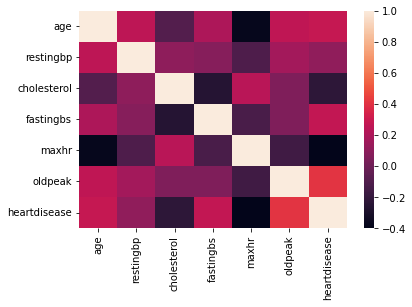

In [29]:
sns.heatmap(corr_matrix)

In [38]:
df_full_train[numerical].corrwith(df_full_train.heartdisease).abs().sort_values(ascending=False)

maxhr          0.395854
oldpeak        0.378351
age            0.276919
cholesterol    0.271679
fastingbs      0.242690
restingbp      0.120185
dtype: float64

#### Mutual information

In [49]:
from sklearn.metrics import mutual_info_score

In [50]:
def mutual_info_target_score(series):
    return mutual_info_score(series, df_full_train.heartdisease)

In [51]:
mi = df_full_train[categorical].apply(mutual_info_target_score)
mi.sort_values(ascending=False)

st_slope          0.184472
chestpaintype     0.151883
exerciseangina    0.123210
sex               0.046335
restingecg        0.006789
dtype: float64

## Model training
Trained multiple models (linear and tree-based)

#### Use Scikit-Learn to encode categorical features

In [54]:
from sklearn.feature_extraction import DictVectorizer

In [55]:
dv = DictVectorizer(sparse=False)

In [56]:
train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [57]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.fit_transform(val_dicts)

### Training logistic regression with Scikit-Learn

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [61]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [64]:
y_pred_bin = model.predict(X_val)
roc_auc_score(y_val, y_pred_bin)

0.8427859515899383

### Training XGBoost model

In [65]:
import xgboost as xgb

In [71]:
features = dv.get_feature_names() 
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [72]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

[14:22:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1634712354882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [73]:
y_pred = model.predict(dval)

In [74]:
roc_auc_score(y_val, y_pred)

0.8824157570004746

### XGBoost parameter tuning
Tuning the following parameters:

   * eta
   * max_depth
   * min_child_weight

In [76]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [75]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [151]:
scores = {}

In [156]:
%%capture output

xgb_params = {
    'eta': 0.3, # 0.01, 0.1, 0.3
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [157]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

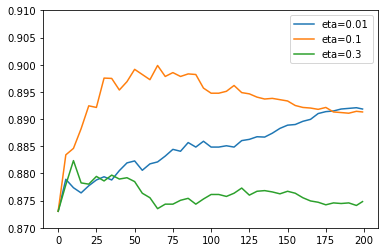

In [158]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.87, 0.91)
plt.legend()

In [134]:
scores = {}

In [147]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [148]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

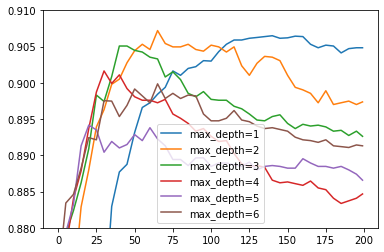

In [149]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.88, 0.91)
plt.legend()

In [166]:
scores = {}

In [173]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 2,
    'min_child_weight': 30,  # 1, 10, 30
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [174]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

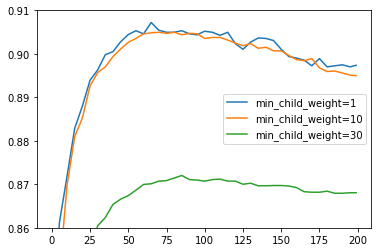

In [177]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.ylim(0.86, 0.91)
plt.legend()

#### Training the final model

In [204]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 2,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=65)

In [205]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.9069767441860466

In [206]:
df_full_train = df_full_train.reset_index(drop=True)

In [207]:
y_full_train = df_full_train.heartdisease.values

In [208]:
del df_full_train['heartdisease']

In [209]:
dicts_full_train = df_full_train.to_dict(orient='records')

# dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [210]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=dv.get_feature_names())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())

/home/pymlboot/anaconda3/envs/ml-zoomcamp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [211]:
model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [212]:
y_pred = model.predict(dtest)

In [213]:
roc_auc_score(y_test, y_pred)

0.9541769041769042